#  Ben Li Group Project - Mercedes-Benz Data 

## Group Members: Bethany Smith, Jeremy Demlow, Brandon Eddlestone, Amy C. Gray

### Bethany Smiths Contribution to Analysis 

Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include, for example, the passenger safety cell with crumple zone, the airbag and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium car makers. Daimler’s Mercedes-Benz cars are leaders in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams. .

To ensure the safety and reliability of each and every unique car configuration before they hit the road, Daimler’s engineers have developed a robust testing system. But, optimizing the speed of their testing system for so many possible feature combinations is complex and time-consuming without a powerful algorithmic approach. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Daimler’s production lines.

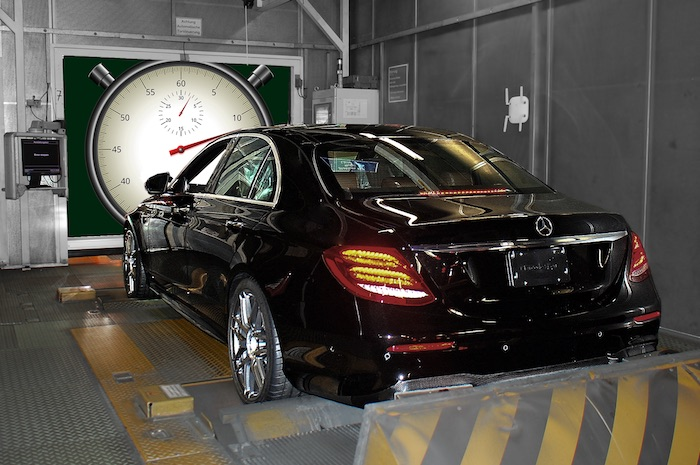

In this analysis , we are challenged to tackle the curse of dimensionality and reduce the time that cars spend on the test bench. We will work with this dataset representing different permutations of Mercedes-Benz car features to predict the time it takes to pass testing. Results of this analysis may contribute to speedier testing, resulting in lower carbon dioxide emissions without reducing Daimler’s standards.

# DATA DESCRIPTION

This dataset contains an anonymized set of variables, each representing a custom feature in a Mercedes car. For example, a variable could be 4WD, added air suspension, or a head-up display.

The ground truth is labeled ‘y’ and represents the time (in seconds) that the car took to pass testing for each variable.



## File descriptions

Variables with letters are categorical. Variables with 0/1 are binary values.

train.csv - the training set
test.csv - the test set, you must predict the 'y' variable for the 'ID's in this file

# DATA CLEANING PHASE 

In [ ]:

library('ggplot2') # visualization
library('ggthemes') # visualization
library('scales') # visualization
library('grid') # visualisation
library('gridExtra') # visualisation
library('corrplot') # visualisation
library('ggfortify') # visualisation
library('dplyr') # data manipulation
library('readr') # data input
library('tibble') # data wrangling
library('stringr') # string manipulation
library('forcats') # factor manipulation
library('mclust') # clustering
library(data.table)
library(caret)

In [7]:
raw_train <- fread("C:/Users/betha/Desktop/EXST_7152/Group_Project/train.csv")
raw_test <- fread("C:/Users/betha/Desktop/EXST_7152/Group_Project/test.csv")

We see that the training data set has a total of 385 unique variables and a total of 4209 observations. The data set has eight categorical variables and 377 numeric continuous observations.

In [23]:
train_count <- nrow(raw_train) 
raw_train[,ID:= NULL] #drop training ID


raw_test[,ID:= NULL] #dropping test ID
raw_test<- cbind(y=0, raw_test)
test_count <- nrow(raw_test)

Warning message in `[.data.table`(raw_train, , `:=`(ID, NULL)):
"Adding new column 'ID' then assigning NULL (deleting it)."

Warning message in `[.data.table`(raw_test, , `:=`(ID, NULL)):
"Adding new column 'ID' then assigning NULL (deleting it)."

In [10]:
#Combine the two datasets for feature engineering 

full <- rbind(raw_train,raw_test)


In [11]:
#Convert Everything to factors so that we have names of each variable

variable_integer_list <- names(sapply(full, is.integer))
variable_character_list <- names(sapply(full, is.character))

full[,variable_integer_list] <- lapply(full[,variable_integer_list, with=FALSE],factor)
full[,variable_character_list] <- lapply(full[,variable_character_list, with=FALSE],factor)

In [12]:
#y as numeric
full$y <- as.numeric(as.character(full$y))

In [13]:
#removing variables without any variance 

zerovariance_variables <- nearZeroVar(full, names=TRUE)
zerovariance_variables

[1] "X4"   "X10"  "X11"  "X15"  "X16"  "X17"  "X18"  "X21"  "X23"  "X24" 
 [11] "X26"  "X28"  "X29"  "X30"  "X32"  "X33"  "X34"  "X36"  "X38"  "X39" 
 [21] "X40"  "X41"  "X42"  "X44"  "X47"  "X48"  "X52"  "X53"  "X54"  "X55" 
 [31] "X56"  "X57"  "X59"  "X60"  "X61"  "X62"  "X63"  "X65"  "X66"  "X67" 
 [41] "X69"  "X73"  "X74"  "X75"  "X76"  "X77"  "X78"  "X79"  "X82"  "X83" 
 [51] "X86"  "X87"  "X88"  "X89"  "X90"  "X91"  "X92"  "X93"  "X94"  "X95" 
 [61] "X97"  "X99"  "X102" "X104" "X105" "X106" "X107" "X108" "X109" "X110"
 [71] "X111" "X112" "X113" "X117" "X120" "X122" "X123" "X124" "X125" "X126"
 [81] "X128" "X130" "X131" "X134" "X135" "X136" "X138" "X140" "X141" "X143"
 [91] "X145" "X146" "X147" "X148" "X152" "X153" "X159" "X160" "X162" "X165"
[101] "X166" "X167" "X169" "X170" "X172" "X173" "X174" "X175" "X176" "X179"
[111] "X183" "X184" "X185" "X190" "X192" "X195" "X196" "X197" "X198" "X199"
[121] "X200" "X203" "X204" "X205" "X206" "X207" "X210" "X211" "X212" "X213"
[131] "X214" "X216" "X217" "X221" "X222" "X226" "X227" "X228" "X229" "X230"
[141] "X231" "X232" "X233" "X235" "X236" "X237" "X239" "X240" "X242" "X243"
[151] "X245" "X248" "X249" "X252" "X253" "X254" "X255" "X257" "X258" "X259"
[161] "X260" "X262" "X263" "X264" "X266" "X267" "X268" "X269" "X270" "X271"
[171] "X272" "X274" "X276" "X277" "X278" "X279" "X280" "X281" "X282" "X284"
[181] "X287" "X288" "X289" "X290" "X291" "X292" "X293" "X295" "X296" "X297"
[191] "X298" "X299" "X302" "X305" "X306" "X307" "X308" "X309" "X310" "X312"
[201] "X315" "X317" "X318" "X319" "X320" "X322" "X323" "X325" "X326" "X328"
[211] "X330" "X332" "X333" "X335" "X338" "X339" "X340" "X341" "X342" "X344"
[221] "X345" "X346" "X347" "X349" "X353" "X357" "X359" "X361" "X364" "X365"
[231] "X366" "X369" "X370" "X371" "X372" "X373" "X378" "X379" "X380" "X382"
[241] "X383" "X384" "X385"

In [14]:
for (z in zerovariance_variables){
    full[, eval(z) := NULL]
}

In [15]:
names(full)
ncol(full)

[1] "y"    "X0"   "X1"   "X2"   "X3"   "X5"   "X6"   "X8"   "X12"  "X13" 
 [11] "X14"  "X19"  "X20"  "X22"  "X27"  "X31"  "X35"  "X37"  "X43"  "X45" 
 [21] "X46"  "X49"  "X50"  "X51"  "X58"  "X64"  "X68"  "X70"  "X71"  "X80" 
 [31] "X81"  "X84"  "X85"  "X96"  "X98"  "X100" "X101" "X103" "X114" "X115"
 [41] "X116" "X118" "X119" "X127" "X129" "X132" "X133" "X137" "X139" "X142"
 [51] "X144" "X150" "X151" "X154" "X155" "X156" "X157" "X158" "X161" "X163"
 [61] "X164" "X168" "X171" "X177" "X178" "X180" "X181" "X182" "X186" "X187"
 [71] "X189" "X191" "X194" "X201" "X202" "X208" "X209" "X215" "X218" "X219"
 [81] "X220" "X223" "X224" "X225" "X234" "X238" "X241" "X244" "X246" "X247"
 [91] "X250" "X251" "X256" "X261" "X265" "X273" "X275" "X283" "X285" "X286"
[101] "X294" "X300" "X301" "X304" "X311" "X313" "X314" "X316" "X321" "X324"
[111] "X327" "X329" "X331" "X334" "X336" "X337" "X343" "X348" "X350" "X351"
[121] "X352" "X354" "X355" "X356" "X358" "X360" "X362" "X363" "X367" "X368"
[131] "X374" "X375" "X376" "X377"

[1] 134

In [17]:
#creating cleaned data sets that are split
clean_train = full[1:train_count,]
clean_test = full[(train_count+1):nrow(full),]


In [18]:
# Write CSV in R
write.csv(clean_train, file = "C:/Users/betha/Desktop/EXST_7152/Group_Project/clean_train.csv")
write.csv(clean_test, file = "C:/Users/betha/Desktop/EXST_7152/Group_Project/clean_test.csv")
write.csv(full, file = "C:/Users/betha/Desktop/EXST_7152/Group_Project/clean_full.csv")

In [26]:
glimpse(full)

Observations: 8,418
Variables: 134
$ y    <dbl> 130.81, 88.53, 76.26, 80.62, 78.02, 92.93, 128.76, 91.91, 108....
$ X0   <chr> "k", "k", "az", "az", "az", "t", "al", "o", "w", "j", "h", "al...
$ X1   <chr> "v", "t", "w", "t", "v", "b", "r", "l", "s", "b", "r", "r", "b...
$ X2   <chr> "at", "av", "n", "n", "n", "e", "e", "as", "as", "aq", "r", "e...
$ X3   <chr> "a", "e", "c", "f", "f", "c", "f", "f", "e", "c", "f", "f", "c...
$ X5   <chr> "u", "y", "x", "x", "h", "g", "f", "f", "f", "f", "f", "f", "f...
$ X6   <chr> "j", "l", "j", "l", "d", "h", "h", "j", "i", "a", "h", "h", "g...
$ X8   <chr> "o", "o", "x", "e", "n", "s", "s", "a", "h", "e", "p", "o", "m...
$ X12  <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,...
$ X13  <int> 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,...
$ X14  <int> 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,...
$ X19  <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,...
$ X20  <int> 0, 0

# EXPLORATORY ANALYSIS 

In [22]:
library('ggplot2') # visualization
library('ggthemes') # visualization
library('scales') # visualization
library('grid') # visualisation
library('gridExtra') # visualisation
library('corrplot') # visualisation
library('ggfortify') # visualisation
library('dplyr') # data manipulation
library('tibble') # data wrangling
library('stringr') # string manipulation
library('forcats') # factor manipulation
library('mclust') # clustering
library('dplyr') # data manipulation
library('readr') # data input
library('tibble') # data wrangling
library('stringr') # string manipulation
library('forcats') # factor manipulation
library('mclust') # clustering

In [27]:
for (i in seq(2,8)){
  print(str_c("Feature", colnames(full)[i], "has these unique values:", sep=" "))
  print(str_sort(unique(full[[i]])))
}

[1] "Feature X0 has these unique values:"
 [1] "a"  "aa" "ab" "ac" "ad" "ae" "af" "ag" "ai" "aj" "ak" "al" "am" "an" "ao"
[16] "ap" "aq" "as" "at" "au" "av" "aw" "ax" "ay" "az" "b"  "ba" "bb" "bc" "c" 
[31] "d"  "e"  "f"  "g"  "h"  "i"  "j"  "k"  "l"  "m"  "n"  "o"  "p"  "q"  "r" 
[46] "s"  "t"  "u"  "v"  "w"  "x"  "y"  "z" 
[1] "Feature X1 has these unique values:"
 [1] "a"  "aa" "ab" "b"  "c"  "d"  "e"  "f"  "g"  "h"  "i"  "j"  "k"  "l"  "m" 
[16] "n"  "o"  "p"  "q"  "r"  "s"  "t"  "u"  "v"  "w"  "y"  "z" 
[1] "Feature X2 has these unique values:"
 [1] "a"  "aa" "ab" "ac" "ad" "ae" "af" "ag" "ah" "ai" "aj" "ak" "al" "am" "an"
[16] "ao" "ap" "aq" "ar" "as" "at" "au" "av" "aw" "ax" "ay" "b"  "c"  "d"  "e" 
[31] "f"  "g"  "h"  "i"  "j"  "k"  "l"  "m"  "n"  "o"  "p"  "q"  "r"  "s"  "t" 
[46] "u"  "w"  "x"  "y"  "z" 
[1] "Feature X3 has these unique values:"
[1] "a" "b" "c" "d" "e" "f" "g"
[1] "Feature X5 has these unique values:"
 [1] "a"  "aa" "ab" "ac" "ad" "ae" "af" "ag" "ah" "b"  "c"

Also, all values follow a similar pattern of encoding by one or two letters. We dont know what these letter codes represent, but since we are dealing with car customisation it seems resonable to assume that they encode multiple-choice features for your car specifications. 

(As an aside: I can imagine that one could make an educated guess about the real identity of these multi-level features from the number of the levels and their popularity in our data, if one were inclined to do so.)

In [41]:
#I next want to recode the categorical variables as factors.
train <- clean_train %>%
  mutate_at(vars(X0:X8), funs(factor))



train_f <- clean_train %>%
  mutate_at(vars(starts_with("X")), funs(factor))




Below we look at the correlation between those categorical variables in the training data set. Those variables that were initally loaded as text variables, and that were manipulated above to be factors.

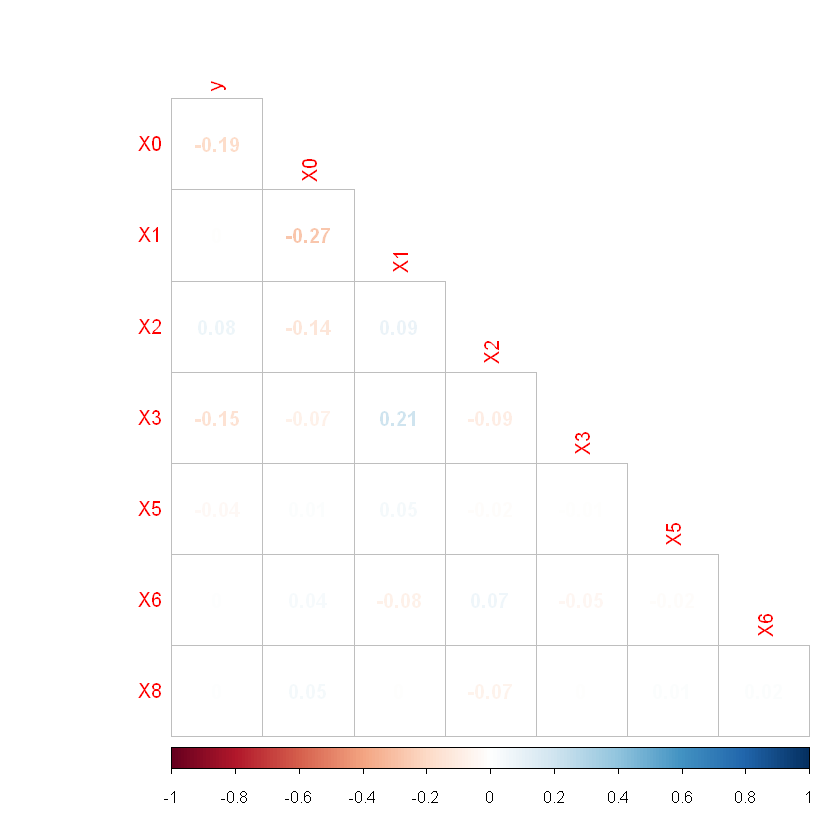

In [42]:
train %>%
  select(y,X0:X8) %>%
  mutate_at(vars(starts_with("X")), funs(as.integer)) %>%
  cor(use="complete.obs", method="pearson") %>%
  corrplot(type="lower", method="number", diag=FALSE)

 We see from the plot above that those categorical variables with somewhat decent correlation with our target variable y. However, none of these correlations are greater than .5 thus none of the correlations are significant, while others basically have no correlation at all.

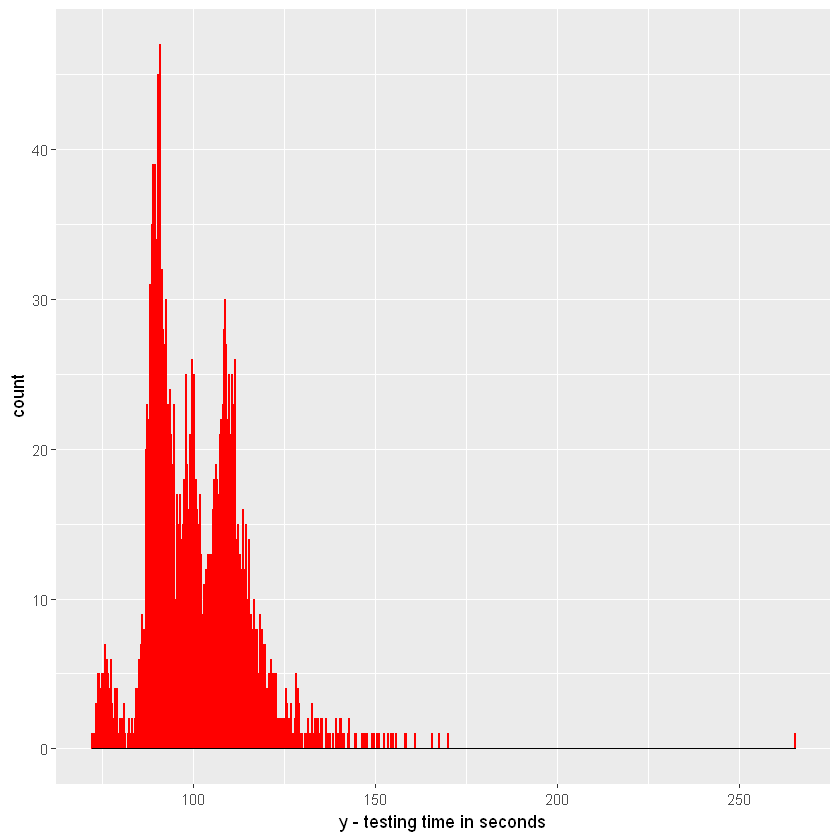

In [43]:
train %>%
  ggplot(aes(y)) +
  geom_histogram(colour="red", bins = length(train$y)/3) +
  geom_density() +
  labs(x = "y - testing time in seconds")

Above is a histogram/density plot of the distribution of the target variable y- testing time in seconds. We see a couple of things from this plot above:

there is a wide variation in the units of y with what appears to be the largest value of y being greater than 250 while the lowest is less than 75 seconds.

The highest density peak in our graph is less than 100, at what is estimated to be roughly y=25 seconds. The second highest density peak is at roughly y=110 seconds and the third highest peak is estimated to be at y=100 seconds.

It appears as if from this histogram/density plot above that we have one extreme observation (outlier) of the dependent variable estimated to be y=265.

Below we re-draw the distribution with these highest peaks outlined in red, to distinguish them.

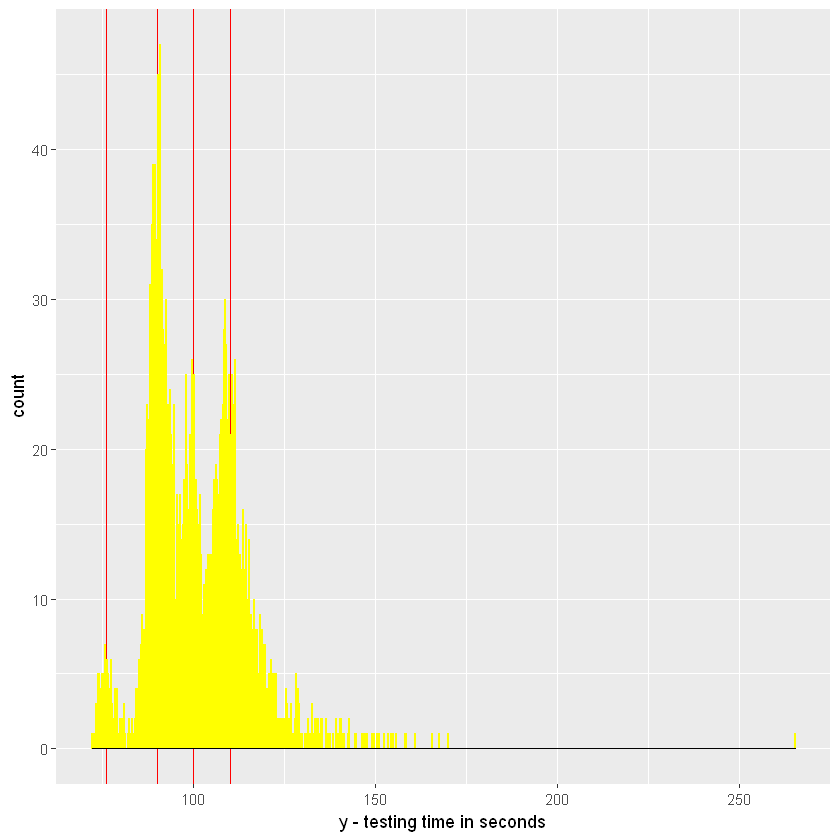

In [44]:
train %>%
  ggplot(aes(y)) +
  geom_vline(xintercept = c(76,90,100,110), colour="red")+
  geom_histogram(colour="yellow", bins = length(train$y)/3) +
  geom_density() +
  labs(x = "y - testing time in seconds")

We next try to further identify key points within out plot above, to identify the key lowest points in the distribution. The key lowest points are: 1. y=80 2. y=95 3. y=105

Below we further identify the lower points of the distribution by putting blue lines at these points.

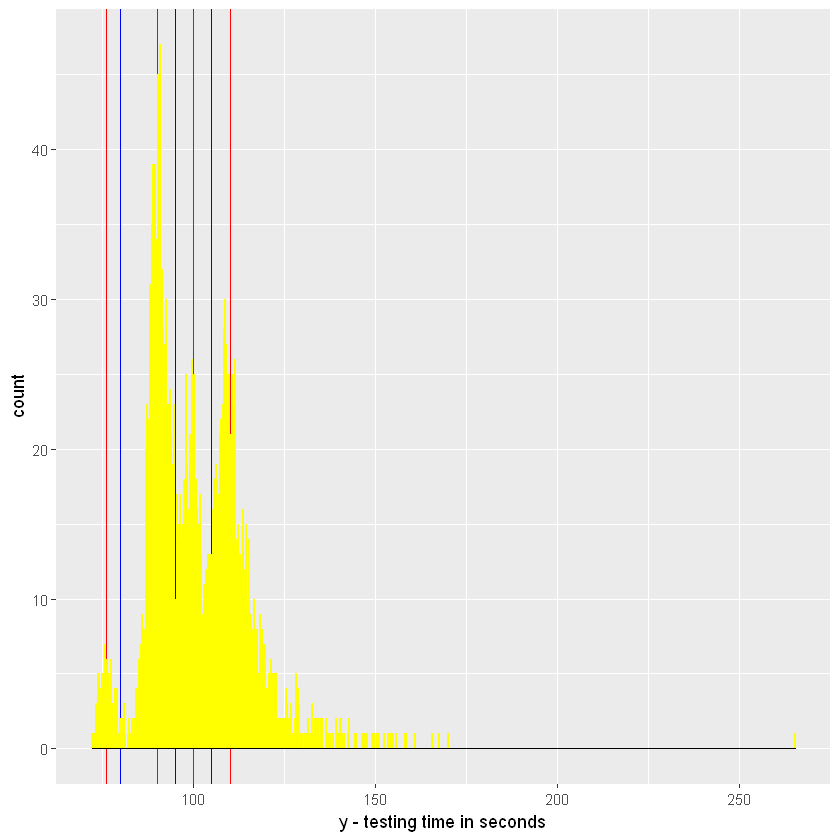

In [45]:
train %>%
  ggplot(aes(y)) +
  geom_vline(xintercept = c(76,90,100,110), colour="red")+
  geom_vline(xintercept = c(80,95,105), colour="blue")+
  geom_histogram(colour="yellow", bins = length(train$y)/3) +
  geom_density() +
  labs(x = "y - testing time in seconds")

 Next in order to make the x axis easier to read, but still accounting for the large time-scales of specific observations we can place a logarithmic scale on this plot. We do this in the code below.

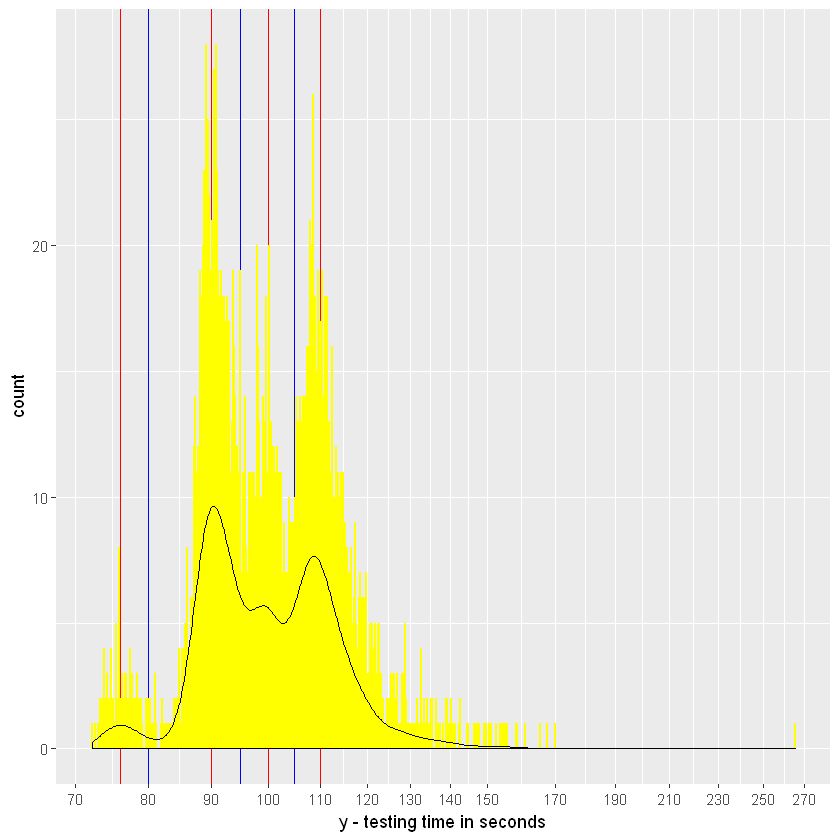

In [46]:
train %>%
  ggplot(aes(y)) +
  geom_vline(xintercept = c(76,90,100,110), colour="red")+ #taking those 3 bins and highlighting in red the 4 main peaks of the data 
  geom_vline(xintercept = c(80,95,105), colour="blue")+  #highlighting in blue the 3 lowest peaks within the binned data
  geom_histogram(colour="yellow", bins = length(train$y)/3) + #dividing the data into three bins
  geom_density() + #fitting the density
  scale_x_log10(breaks=c(seq(70,150,10),seq(170,270,20)) ) + 
  labs(x = "y - testing time in seconds")

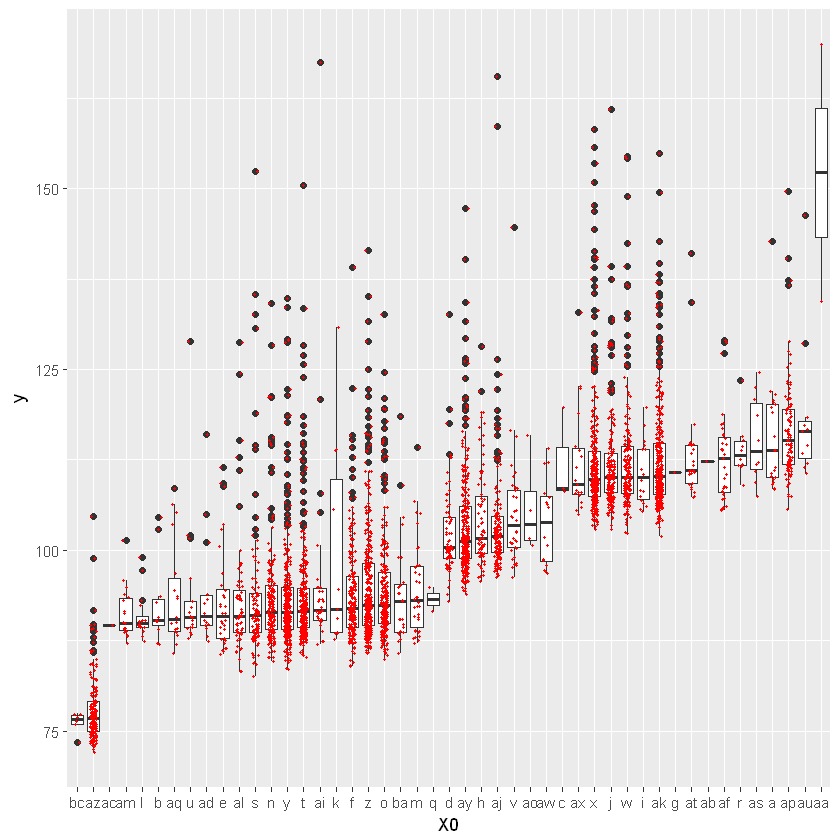

In [47]:
train <- train %>%
  filter(y < 250)
ggplot(train, aes(reorder(X0, y, FUN = median) , y)) + geom_boxplot() + labs(x = "X0") +
  geom_jitter(color="red", width = 0.2, size = 0.4)

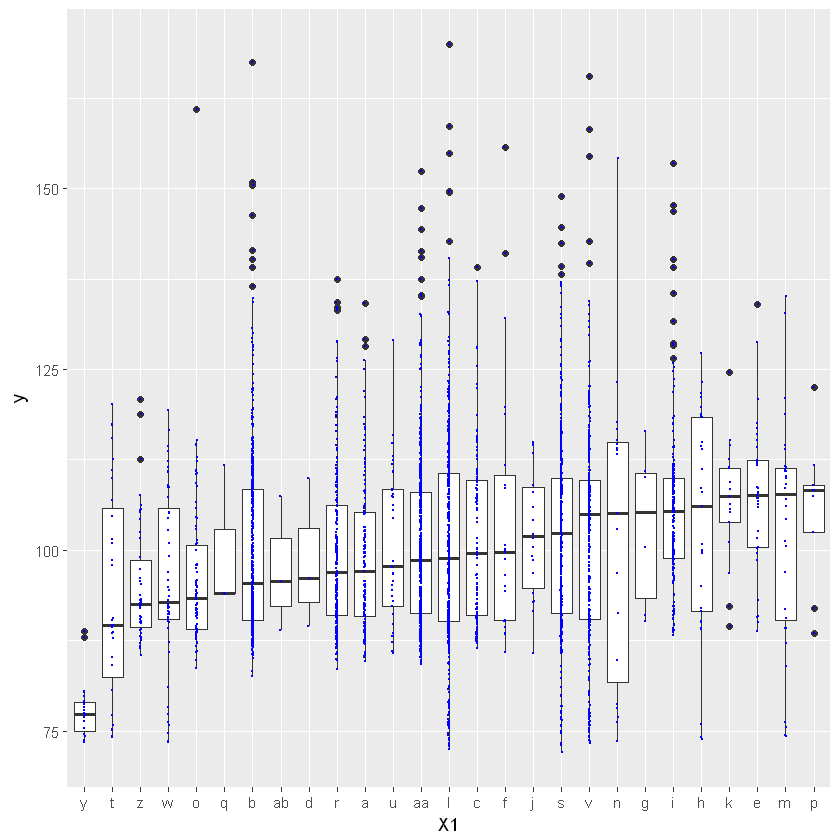

In [49]:
ggplot(train, aes(reorder(X1, y, FUN=median), y)) +
  geom_boxplot()+
  labs(x="X1")+
  geom_jitter(color='blue', width=.02, size=.04)

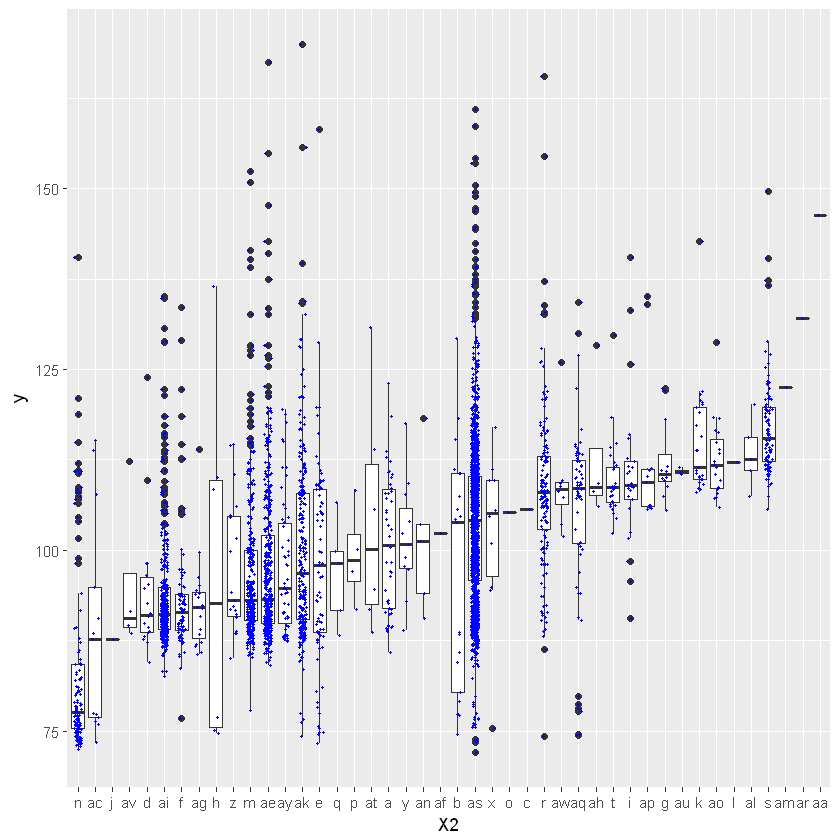

In [50]:
ggplot(train, aes(reorder(X2, y, FUN=median), y))+
  geom_boxplot()+
  labs(x="X2")+
  geom_jitter(color="blue", width=.2, size=.4)

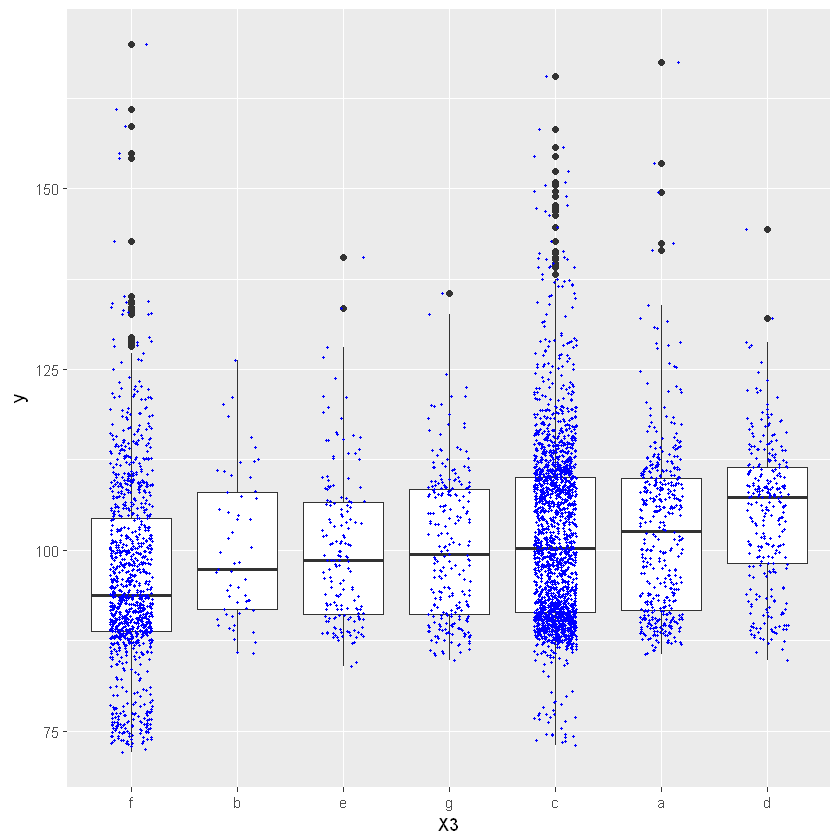

In [51]:
ggplot(train, aes(reorder(X3, y, FUN=median),y)) + 
  geom_boxplot() +
  labs(x="X3")+
  geom_jitter(color="blue", width=.2, size=.4)

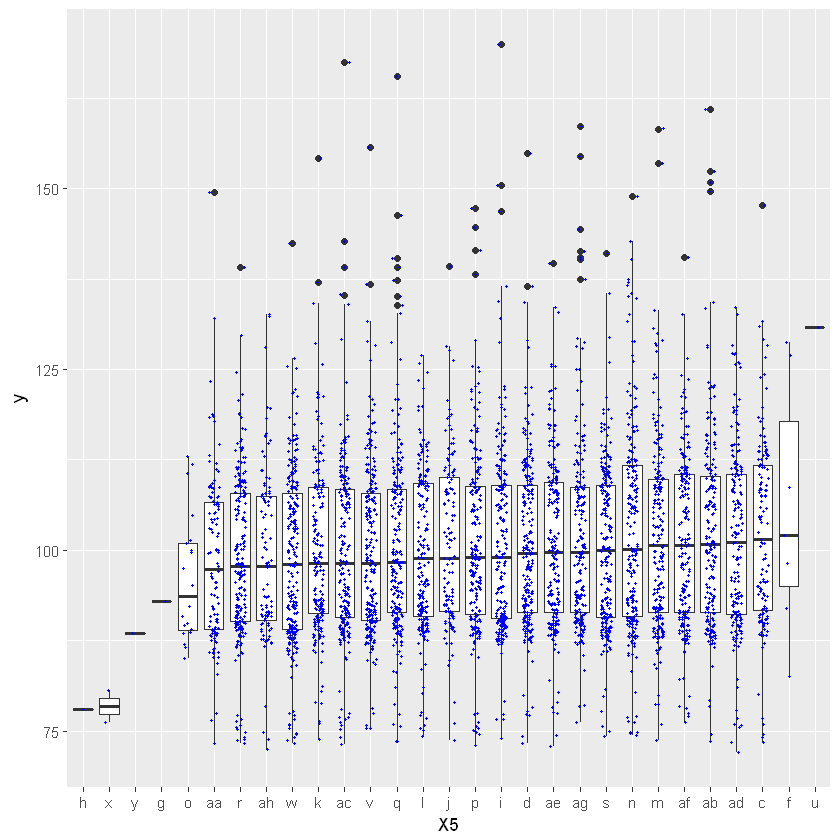

In [55]:
ggplot(train, aes(reorder(X5, y, FUN=median),y)) + 
  geom_boxplot() +
  labs(x="X5")+
  geom_jitter(color="blue", width=.2, size=.4)

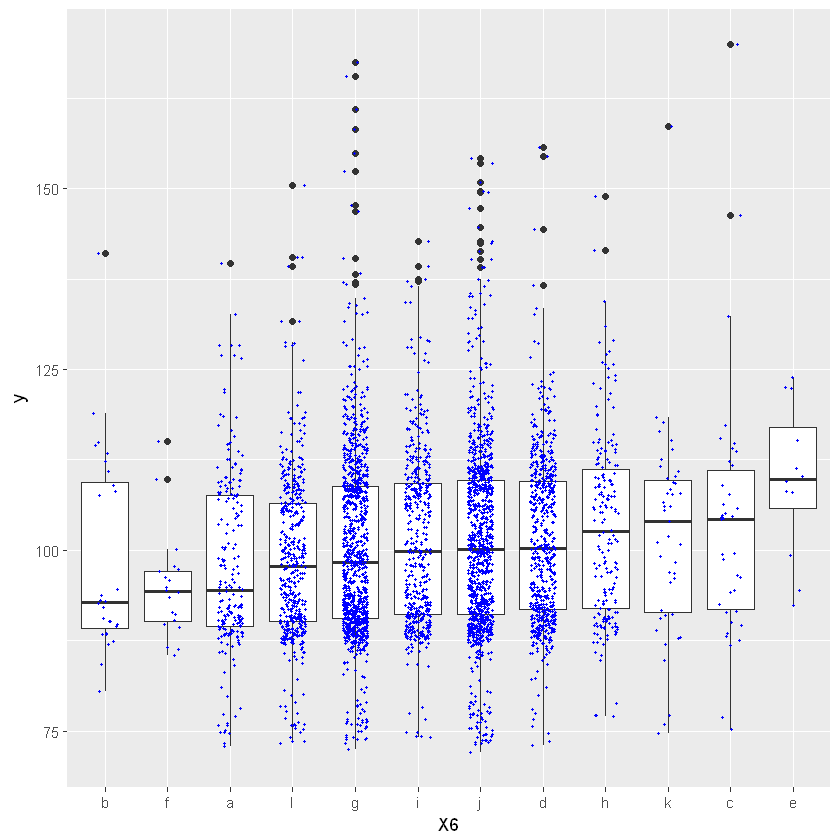

In [56]:
ggplot(train, aes(reorder(X6, y, FUN=median),y)) + 
  geom_boxplot() +
  labs(x="X6")+
  geom_jitter(color="blue", width=.2, size=.4)

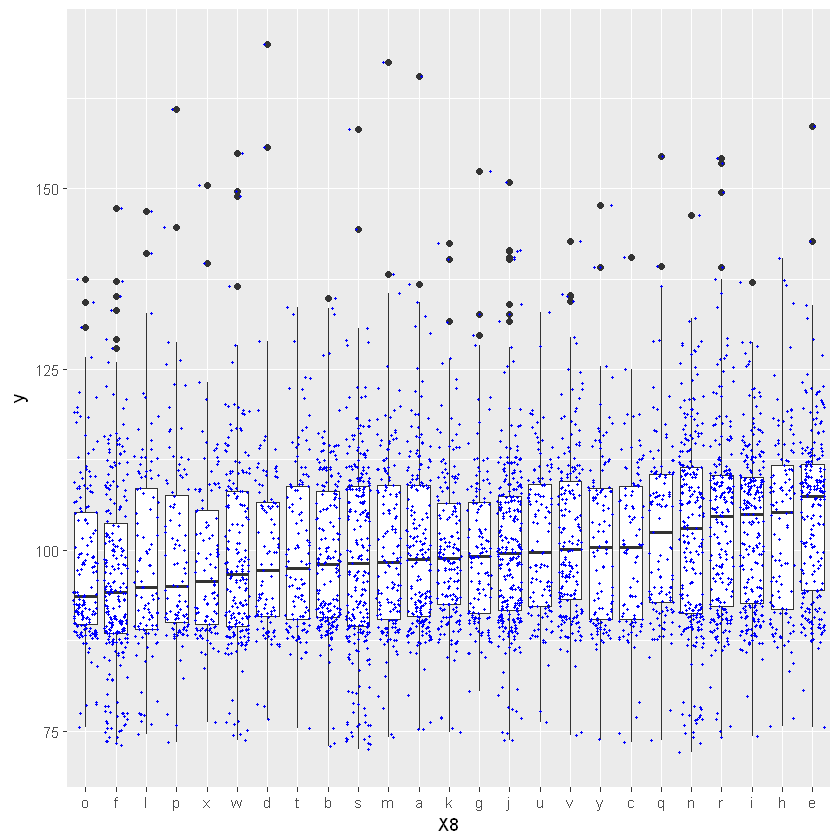

In [57]:
ggplot(train, aes(reorder(X8, y, FUN=median),y)) + 
  geom_boxplot() +
  labs(x="X8")+
  geom_jitter(color="blue", width=.4, size=.6)

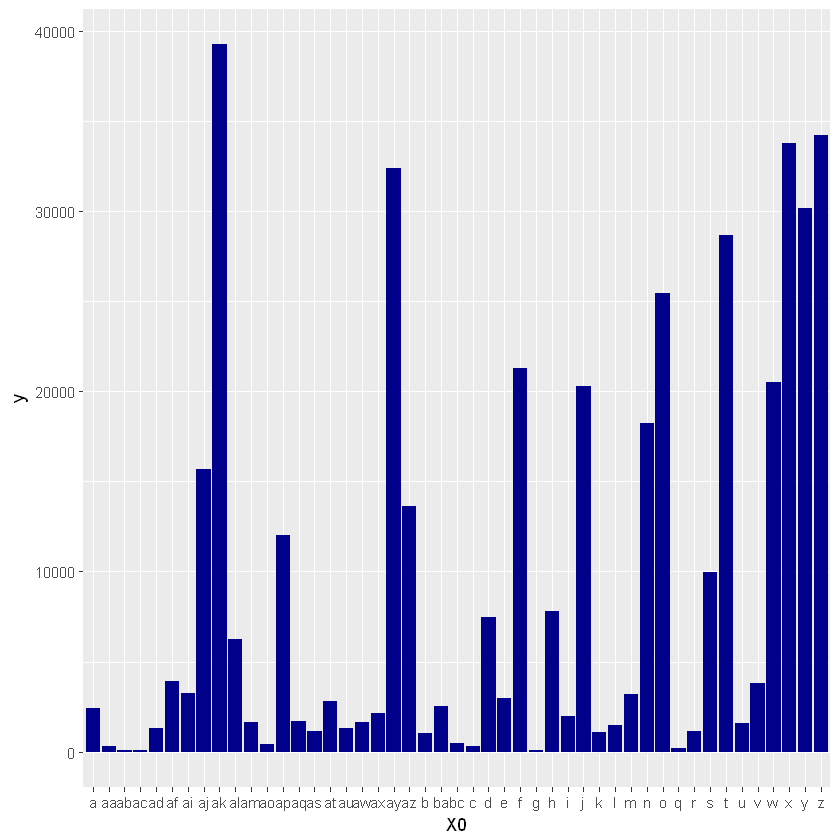

In [58]:
ggplot(train, aes(X0, y))+ geom_bar(stat="identity", fill="darkblue") + scale_x_discrete("X0")


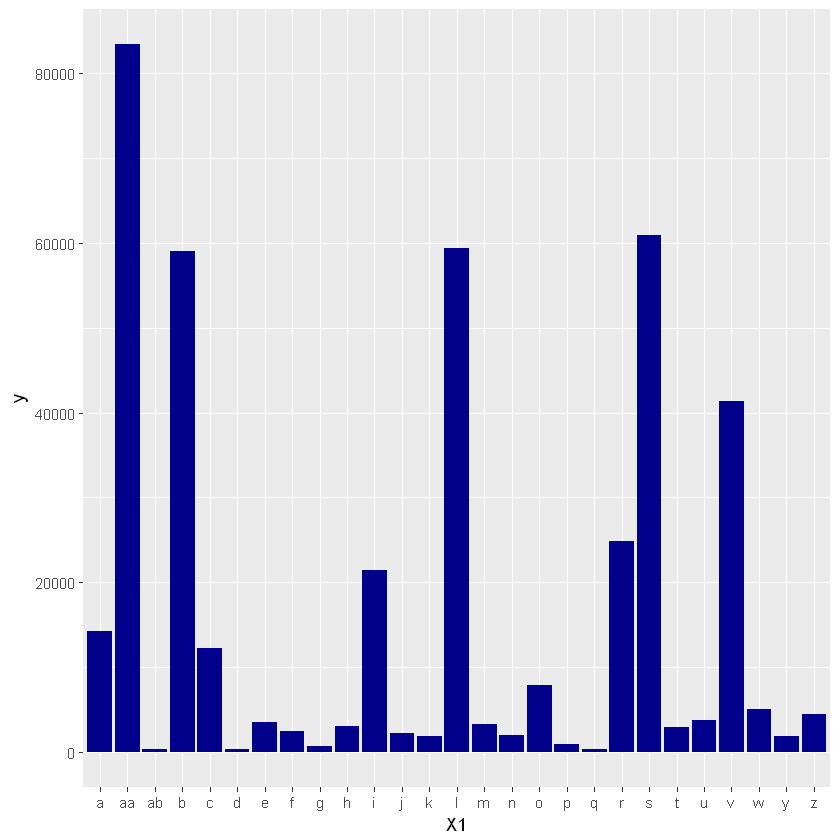

In [60]:
ggplot(train, aes(X1, y))+ geom_bar(stat="identity", fill="darkblue") + scale_x_discrete("X1")


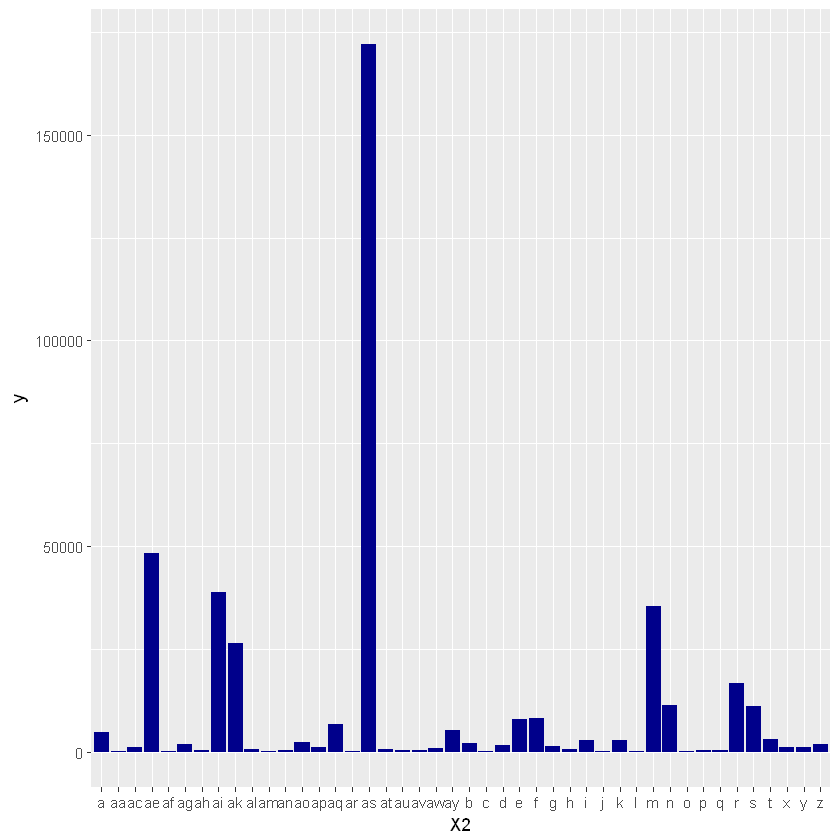

In [61]:
ggplot(train, aes(X2, y))+ geom_bar(stat="identity", fill="darkblue") + scale_x_discrete("X2")


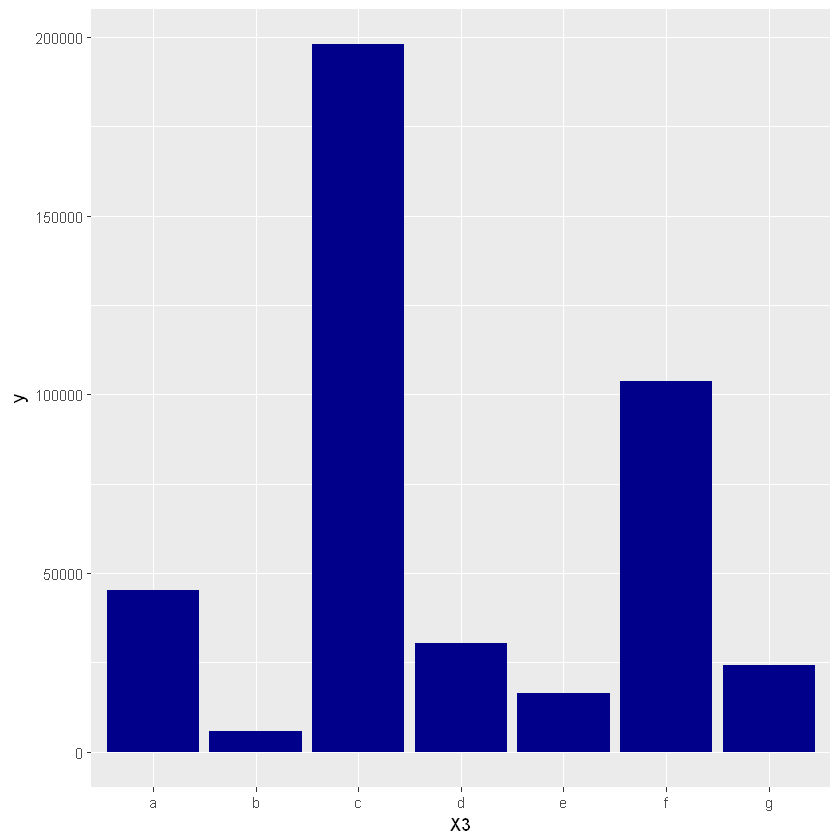

In [62]:
ggplot(train, aes(X3, y))+ geom_bar(stat="identity", fill="darkblue") + scale_x_discrete("X3")


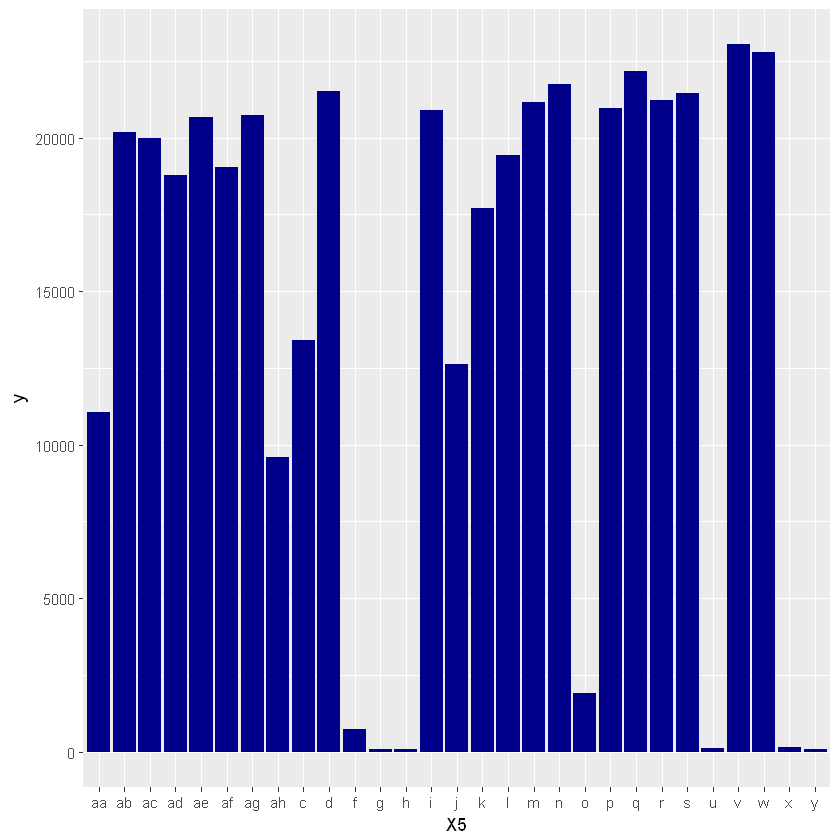

In [63]:
ggplot(train, aes(X5, y))+ geom_bar(stat="identity", fill="darkblue") + scale_x_discrete("X5")


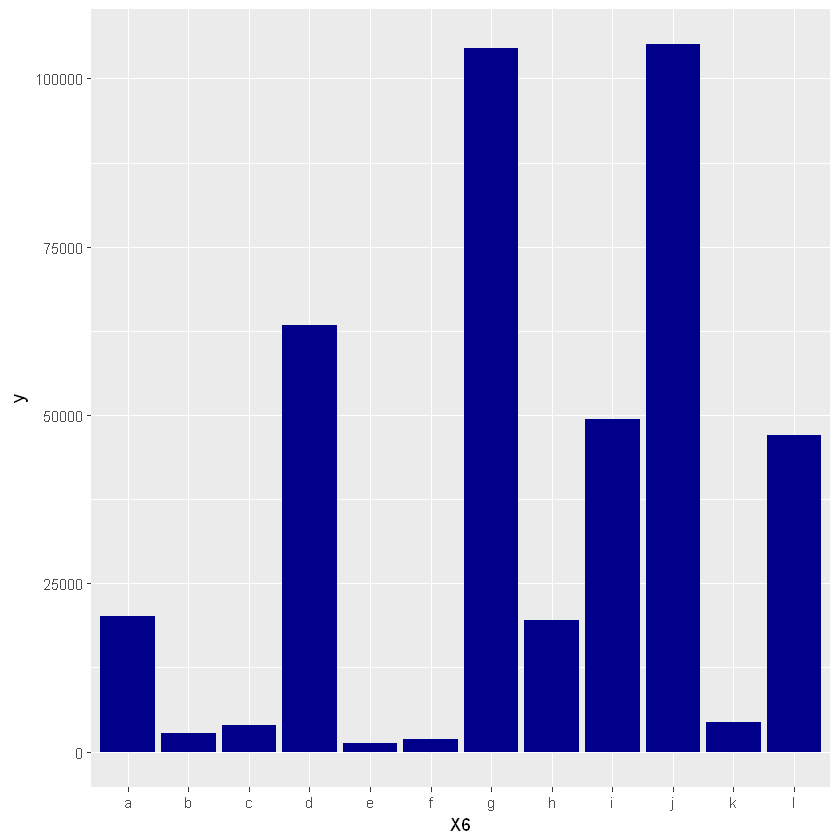

In [64]:
ggplot(train, aes(X6, y))+ geom_bar(stat="identity", fill="darkblue") + scale_x_discrete("X6")


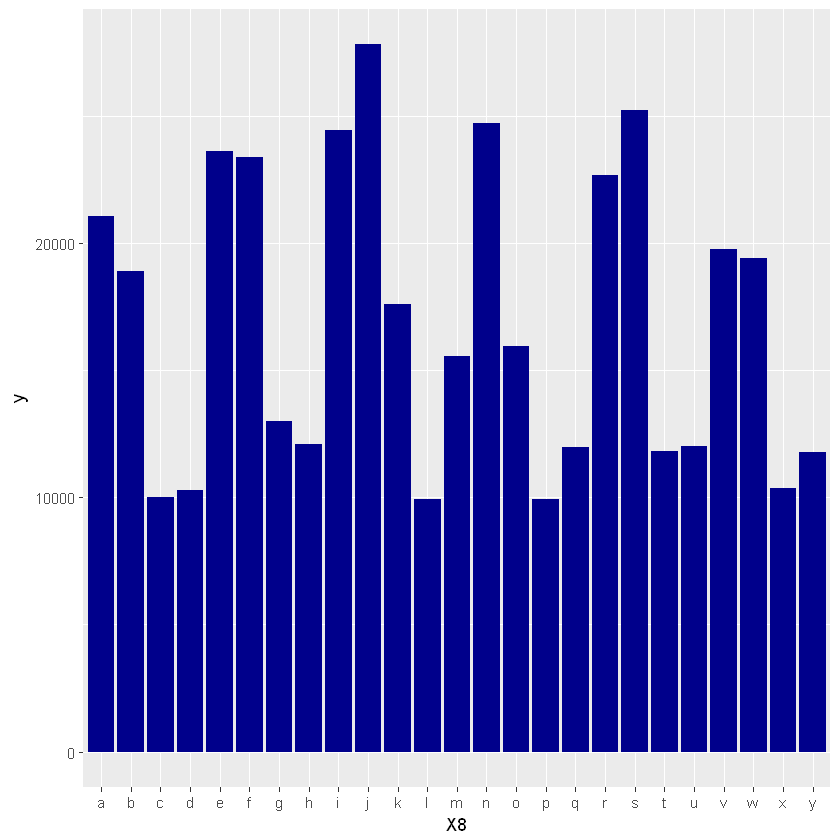

In [66]:
ggplot(train, aes(X8, y))+ geom_bar(stat="identity", fill="darkblue") + scale_x_discrete("X8")


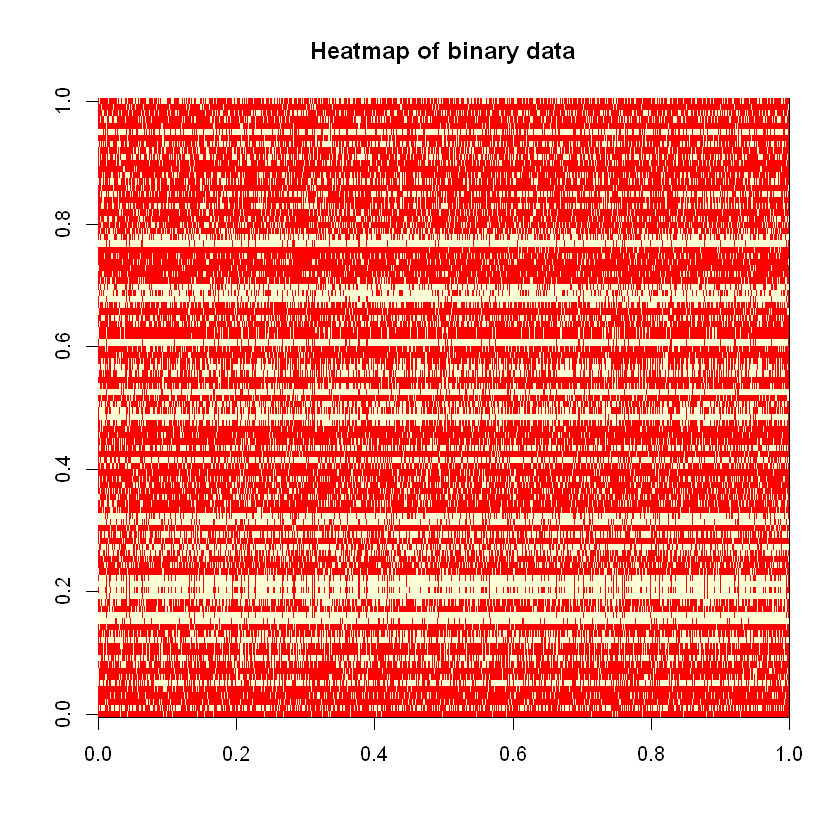

In [78]:
train <- read.csv("C:/Users/betha/Desktop/EXST_7152/Group_Project/clean_train.csv")
test <- read.csv("C:/Users/betha/Desktop/EXST_7152/Group_Project/clean_test.csv")
full <- read.csv("C:/Users/betha/Desktop/EXST_7152/Group_Project/clean_full.csv")
#removing multicolinearity
require(corrplot)
t <- cor(train[,-c(1,3:10)])
highlyCorrelation <- findCorrelation(t,cutoff = 0.95, names = T)

train[,highlyCorrelation] <- NULL
test[,highlyCorrelation] <- NULL
image(as.matrix(train[,-c(1:10)]), main="Heatmap of binary data")

# MODELING PHASE

In [91]:
library('ggplot2') # visualization
library('ggthemes') # visualization
library('scales') # visualization
library('grid') # visualisation
library('gridExtra') # visualisation
library('corrplot') # visualisation
library('dplyr') # data manipulation
library('readr') # data input
library('tibble') # data wrangling
library('stringr') # string manipulation
library('forcats') # factor manipulation
library('mclust') # clustering
library(pls) #partial least squares
library("rstan")
library("caret")
library(glmnet)
library(lars)


Loaded lars 1.2



In [79]:
train$X <- NULL
train$X0 <- NULL
train$X2 <- NULL
train$X5 <- NULL

test$X <- NULL
test$X0 <- NULL
test$X2 <- NULL
test$X5 <- NULL
str(test)

'data.frame':	4209 obs. of  106 variables:
 $ y   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X1  : Factor w/ 27 levels "a","aa","ab",..: 24 4 24 14 21 2 4 21 14 24 ...
 $ X3  : Factor w/ 7 levels "a","b","c","d",..: 6 1 6 6 3 5 4 3 3 6 ...
 $ X6  : Factor w/ 12 levels "a","b","c","d",..: 1 7 10 12 9 7 4 4 10 6 ...
 $ X8  : Factor w/ 25 levels "a","b","c","d",..: 23 25 10 14 13 19 25 1 14 22 ...
 $ X12 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X13 : int  0 0 0 0 0 0 0 1 0 0 ...
 $ X14 : int  0 0 1 0 1 0 0 0 0 1 ...
 $ X19 : int  0 1 0 0 0 1 0 0 0 0 ...
 $ X20 : int  0 0 0 0 0 0 1 1 0 0 ...
 $ X22 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X27 : int  1 1 1 1 1 1 1 0 0 0 ...
 $ X37 : int  1 1 1 1 0 1 0 0 1 0 ...
 $ X43 : int  1 0 0 1 0 0 0 0 0 0 ...
 $ X45 : int  0 1 0 0 0 0 1 0 0 0 ...
 $ X46 : int  1 1 0 1 0 1 1 1 1 0 ...
 $ X49 : int  0 1 0 0 0 1 0 0 1 0 ...
 $ X50 : int  0 1 0 0 0 1 1 0 1 0 ...
 $ X51 : int  0 1 1 0 1 0 1 1 1 1 ...
 $ X64 : int  0 0 0 0 1 0 1 0 0 1 ...
 $ X68 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ 

Preparing data for ridge,lasso,pls models

In [80]:
X<- model.matrix(y~., train)[,-1]


X_test <- model.matrix(y~., test)[,-1]

y <- train$y
dim(X)

[1] 4209  168

In [81]:
dim(X_test)

[1] 4209  168

In [82]:
print(X_test)

     X1aa X1ab X1b X1c X1d X1e X1f X1g X1h X1i X1j X1k X1l X1m X1n X1o X1p X1q
1       0    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
2       0    0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
3       0    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
4       0    0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
5       0    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
6       1    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
7       0    0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
8       0    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
9       0    0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
10      0    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
11      0    0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
12      0    0   1   0   0   0   0   0   0   0   0  

## RIDGE REGRESSION 

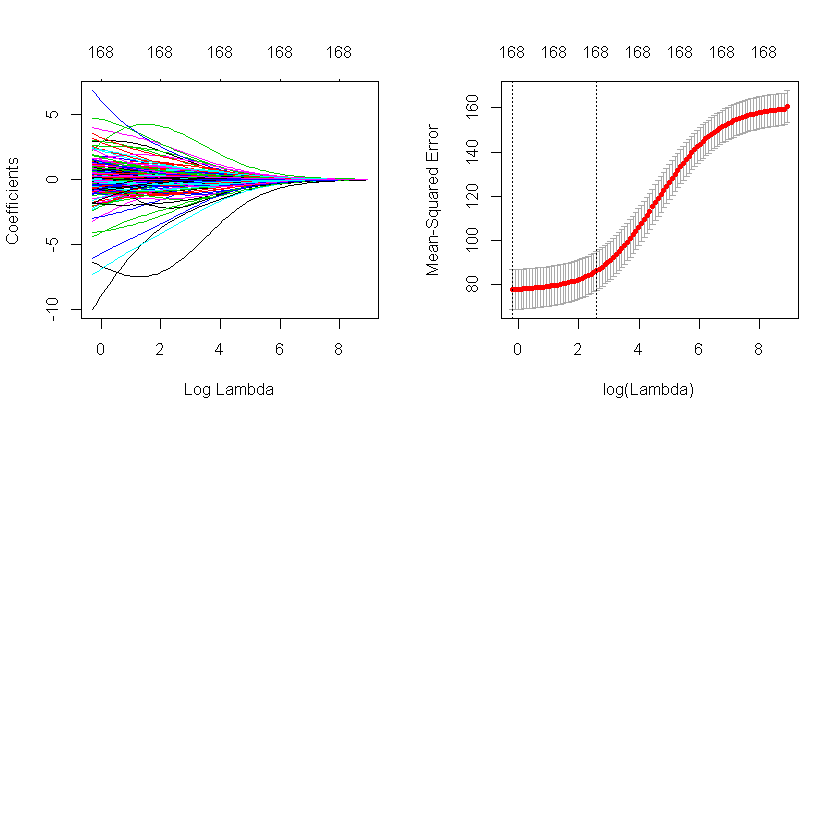

In [86]:
fit.ridge.full <- glmnet(X, y, alpha=0)
cv.ridge = cv.glmnet(X,y, alpha=0)

par(mfrow=c(2,2))
plot(fit.ridge.full, xvar="lambda", label=TRUE)
plot(cv.ridge)

In [87]:
bestlam.ridge=cv.ridge$lambda.min #Getting lambda that gives smallest MSE
bestlam.ridge

[1] 0.8192329

In [88]:
ridge.predict= predict(cv.ridge,type="coefficients", s=bestlam.ridge, newx = X_test)
ridge.Yhat <- predict(fit.ridge.full, type="response", s=bestlam.ridge, newx=X_test)

Calculating Ridge Model Fit Statistics 

In [89]:
ridge.R2 <- function(Y,R.Yhat){
  R2 <- (abs(1 - (sum((Y-R.Yhat)^2)/sum((Y-mean(Y))^2))))
  return(R2)
}
ridge.MSE <- function(Y,R.Yhat){
  return(mean((R.Yhat-(mean(Y)))^2))
}
ridge.SSE <- function(Y, R.Yhat){
  SSE <- (sum((Y-R.Yhat)^2))
  return(SSE)
}
ridge.SSR <- function(Y, R.Yhat){
  SSR <- (sum((R.Yhat- (mean(Y)))^2))
  return(SSR)
}
ridge.SSTO <- function(Y, R.Yhat){
  SSTO <- (sum((Y- (mean(R.Yhat)))^2))
  return(SSTO)
}

In [90]:
print('Ridge r2 score')
ridge.R2(y, ridge.Yhat) 
print('Ridge MSE')
ridge.MSE(y,ridge.Yhat)
print('Ridge SSE')
ridge.SSE(y,ridge.Yhat)
print('Ridge SSR')
ridge.SSR(y,ridge.Yhat)
print('Ridge SSTO')
ridge.SSTO(y,ridge.Yhat)

[1] "Ridge r2 score"


[1] 0.5235242

[1] "Ridge MSE"


[1] 82.18176

[1] "Ridge SSE"


[1] 1030674

[1] "Ridge SSR"


[1] 345903

[1] "Ridge SSTO"


[1] 676826

## LASSO REGRESSION 

Performing Lasso Cross Validation in order to get best lambda that provides the minimum mean squared error for model fit

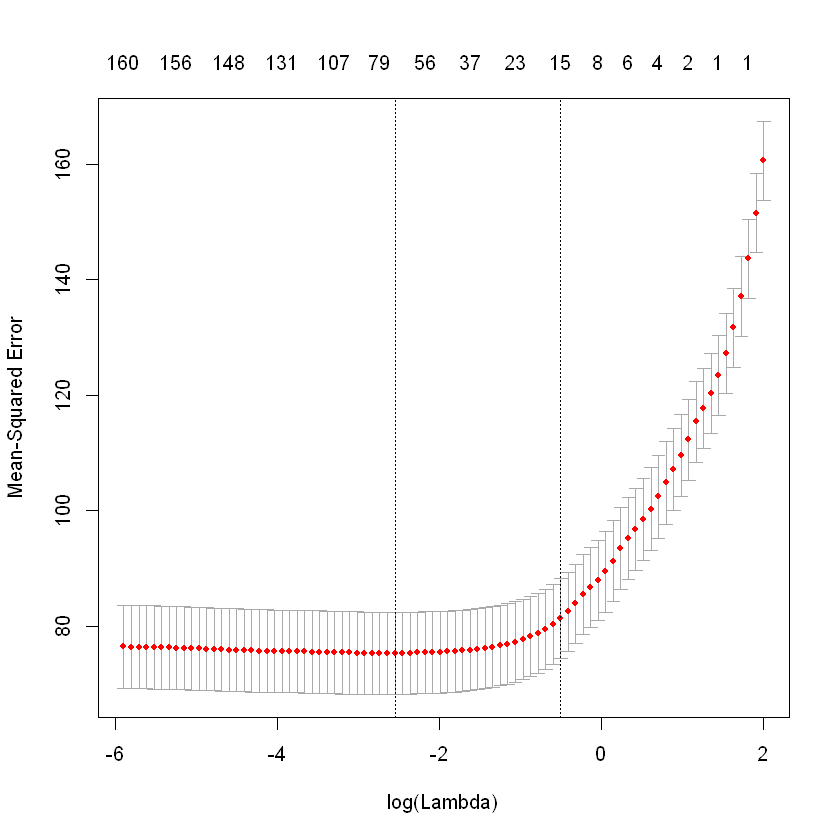

In [92]:
lasso.cv.glm <- cv.glmnet(X, y, nfolds=10, type.measure="mse", alpha=1) 
plot(lasso.cv.glm)

In [93]:
lasso.cv.glm$lambda.min #value of lambda that gives us minimum MSE

[1] 0.07819975

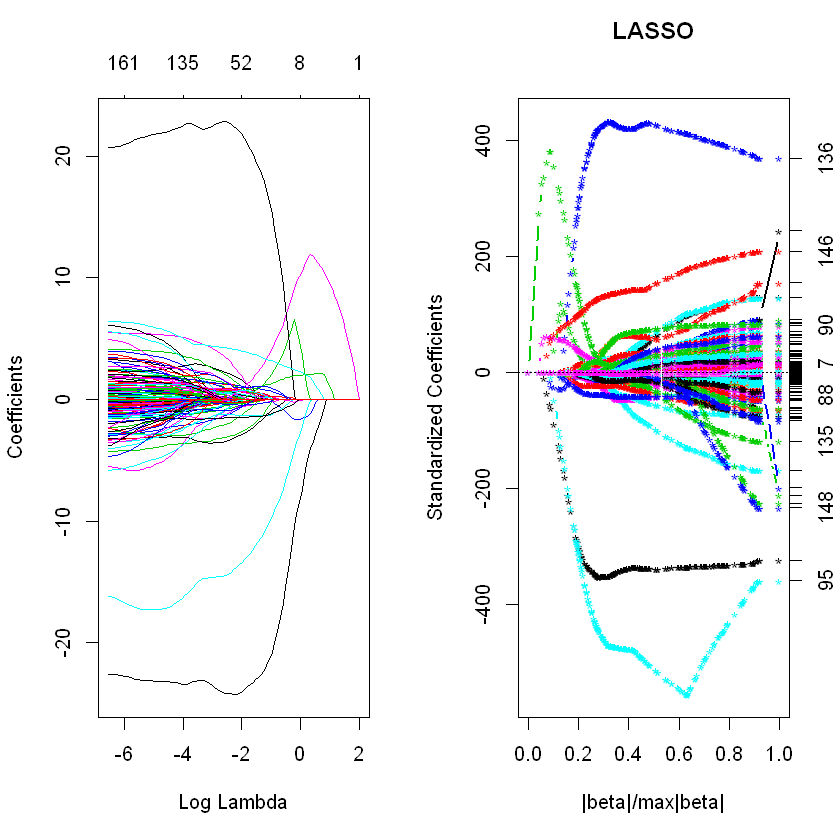

In [94]:
lasso.fit <- lars(X,y,type="lasso")
fit.lasso.full <- glmnet(X, y, alpha=1)
par(mfrow=c(1,2))
plot(fit.lasso.full, xvar="lambda", label=TRUE)
plot(lasso.fit, lwd=2, breaks=F)

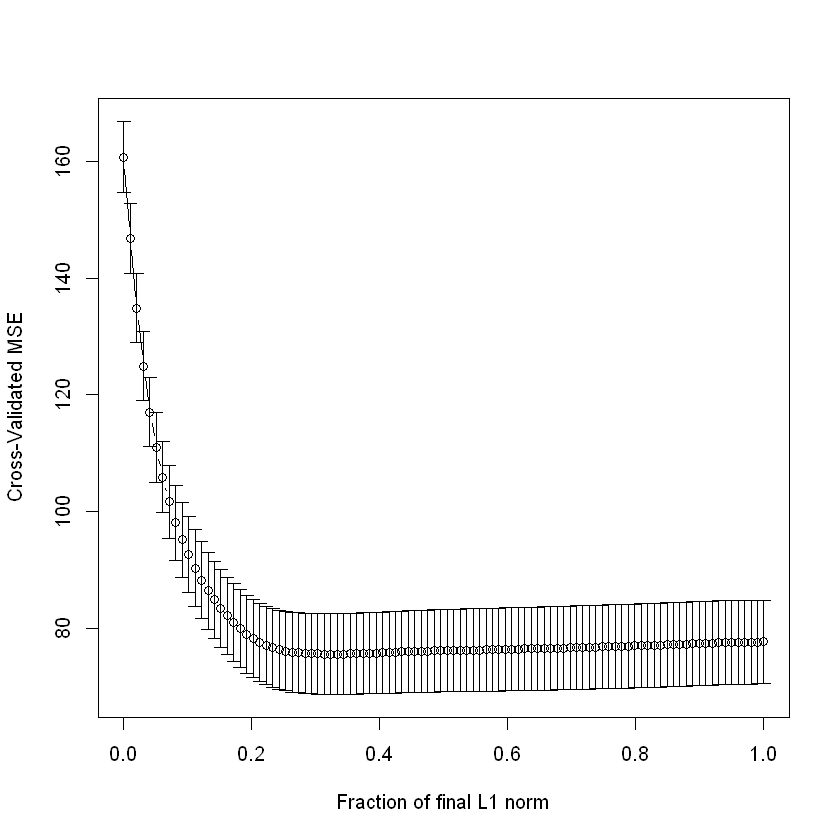

In [95]:
lasso.cv <- cv.lars(X, y, K=10, trace=F, plot.it=T, se=T, type="lasso")

In [96]:
op.frac.lasso <- lasso.cv$index[which.min(lasso.cv$cv)]
op.frac.lasso

[1] 0.3333333

Below we display the variables selected using the lasso model along with the coefficients for each variables 

In [97]:
beta <- predict(lasso.fit, X_test, s=op.frac.lasso,type="coef", mode="fraction")$coef
beta[beta !=0]

X1f           X1h           X1l           X1m           X1n 
  2.264127801   2.107048662   0.525219336  -0.123516719   0.999569671 
          X1p           X1q           X1r           X1t           X1u 
 -0.383839045  -1.016703701   0.745404620  -3.153668812  -1.382333024 
          X1v           X1w           X1y           X3b           X3c 
 -0.237143995  -0.090521205  -3.558735580  -2.092978786   0.758607987 
          X6c           X6d           X6e           X6g           X6h 
  0.951875454  -0.045459711   3.600708521   0.249534876   0.423177592 
          X6j           X8c           X8d           X8f           X8g 
  0.584392361   0.369832909  -0.551305203  -0.001882206  -0.540561254 
          X8i           X8l           X8p           X8r           X8s 
 -0.530760395  -0.023460447   0.219973060   0.535752122  -0.167698442 
          X8t           X8u           X12           X19           X45 
  1.256964627  -0.863799634   0.873510823  -0.117700965  -0.970698542 
          X51           X64           X80           X81          X114 
  0.008996783  -0.199001416 -23.990999376  -0.300197609  -0.126937091 
         X127          X132          X137          X144          X150 
-14.516493618  -1.336908106   0.754939483   0.042470834  -1.008911192 
         X151          X157          X163          X171          X177 
  0.842791695  -0.219996191  -0.467516526   0.010902403   0.167463559 
         X180          X181          X187          X209          X220 
  0.512607521   0.134301889   1.661537833   0.520832700  -0.344523496 
         X225          X244          X256          X265          X275 
 -0.094841167   1.307584705  -1.251042442  22.752505615   0.662125322 
         X301          X304          X311          X316          X327 
  1.405882765  -0.432276644   4.278207872  -1.523962486   0.107466699 
         X337          X350          X351          X352          X355 
  0.087247991  -0.203759696  -0.023526585  -0.906745813   1.669357881 
         X360          X368          X374          X376 
  0.052442229   1.542548805   0.491907863   0.035930052

In [98]:
y.pred <- predict(lasso.fit,X_test, s=op.frac.lasso, type="fit", mode="fraction")$fit


Calculating the Lasso Model Fit statistics 

In [99]:
lasso.R2 <- function(Y,Yhat){
  R2 <- (abs(1 - (sum((Y-Yhat)^2)/sum((Y-mean(Y))^2))))
  return(R2)
}
lasso.MSE <- function(Y,Yhat){
  return(mean((Yhat-(mean(Y)))^2))
}
lasso.SSE <- function(Y, Yhat){
  SSE <- (sum((Y-Yhat)^2))
  return(SSE)
}
lasso.SSR <- function(Y, Yhat){
  SSR <- (sum((Yhat- (mean(Y)))^2))
  return(SSR)
}
lasso.SSTO <- function(Y, Yhat){
  SSTO <- (sum((Y- (mean(Yhat)))^2))
  return(SSTO)
}

In [100]:
print('Lasso r2 score')
lasso.R2(y, y.pred)
print('Lasso MSE')
lasso.MSE(y,y.pred)
print('Lasso SSE')
lasso.SSE(y,y.pred)
print('Lasso SSR')
lasso.SSR(y,y.pred)
print('Lasso SSTO')
lasso.SSTO(y,y.pred)


[1] "Lasso r2 score"


[1] 0.5403396

[1] "Lasso MSE"


[1] 84.45225

[1] "Lasso SSE"


[1] 1042049

[1] "Lasso SSR"


[1] 355459.5

[1] "Lasso SSTO"


[1] 676787.7

## Partial Least Squares Model 

In [101]:
pls.fit = plsr(y~., data=train, scale=TRUE, validation="CV") #fitting the model via. cross validation 
summary(pls.fit)

Data: 	X dimension: 4209 168 
	Y dimension: 4209 1
Fit method: kernelpls
Number of components considered: 168

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           12.68    10.31    9.438    9.126    9.006    8.966    8.954
adjCV        12.68    10.31    9.435    9.120    8.998    8.955    8.940
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       8.949    8.938    8.917     8.892     8.855     8.834     8.824
adjCV    8.932    8.919    8.897     8.872     8.835     8.814     8.804
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps  20 comps
CV        8.820     8.812     8.797      8.78     8.772     8.769     8.768
adjCV     8.798     8.790     8.775      8.76     8.753     8.750     8.748
       21 comps  22 comps  23 comps  24 comps  25 comps  26 comps  27 comps
CV        8.767     8.763     8.762     8.764     8.769      8.77     8.769
adjCV     8

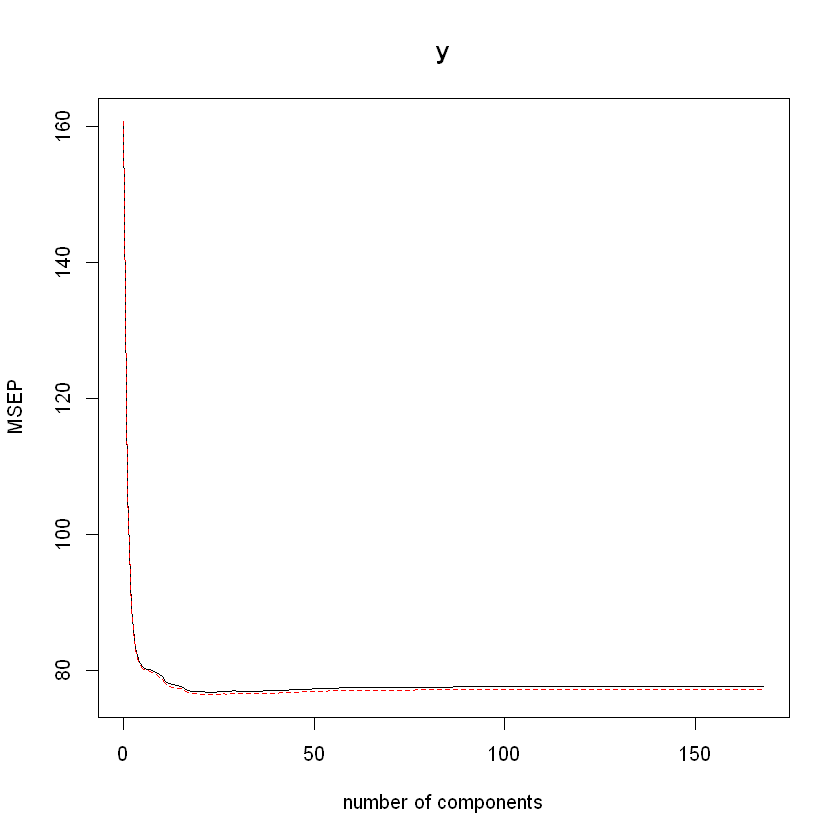

In [102]:
validationplot(pls.fit, val.type = "MSEP")

Using model fit with optimal number of principal components to predict Y on Test data 

In [104]:
plsYhat=predict(pls.fit,X_test,ncomp = 23) 

Calculating Partial Least Squares Predicted Model Fit Statistics 

In [105]:
PLS.R2 <- function(Y,Yhat){
  R2 <- (abs(1 - (sum((Y-Yhat)^2)/sum((Y-mean(Y))^2))))
  return(R2)
}
PLS.MSE <- function(Y,Yhat){
  return(mean((Yhat-(mean(Y)))^2))
}
PLS.SSE <- function(Y, Yhat){
  SSE <- (sum((Y-Yhat)^2))
  return(SSE)
}
PLS.SSR <- function(Y, Yhat){
  SSR <- (sum((Yhat- (mean(Y)))^2))
  return(SSR)
}
PLS.SSTO <- function(Y, Yhat){
  SSTO <- (sum((Y- (mean(Yhat)))^2))
  return(SSTO)
}

In [107]:
print('PLS r2 score')
PLS.R2(y, plsYhat) 
print('PLS MSE score')
PLS.MSE(y, plsYhat) 
print('PLS SSE score')
PLS.SSE(y, plsYhat) 
print('PLS SSR score')
PLS.SSR(y, plsYhat)
print('PLS SSTO score')
PLS.SSTO(y, plsYhat) 


[1] "PLS r2 score"


[1] 0.5813285

[1] "PLS MSE score"


[1] 90.7956

[1] "PLS SSE score"


[1] 1069779

[1] "PLS SSR score"


[1] 382158.7

[1] "PLS SSTO score"


[1] 676908